# Personalised Mecidine - Exploratory Data Analysis

### Key Points for presentation
- Describe the problem.
- Describe the dataset using visualizations and statistical measures.
- Describe the challenges you might face and propose some solutions.
- Give a high level time plan for finishing the project.

## Goal of project
Automatically classify genetic mutations that contribute to cancer tumor growth drivers) vs. presence of mutations that don’t affect the tumors (passengers)

## Importing data

In [49]:
import pandas as pd

In [95]:
d_train = pd.read_csv('genetic-data/training_variants')
d_train.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

### Variable Understanding

- ID - A specific gene of the specimen
- Gene - The specific gene where the mutation took place
- Variation - the nature of the mutation
- Class - Class which we must predict
    - between 1 and 9

In [51]:
# get intitial statistics for columns
d_train.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [52]:
d_train.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
dtype: object

In [53]:
d_train.apply(pd.Series.nunique)

ID           3321
Gene          264
Variation    2996
Class           9
dtype: int64

We now know that there are 3321 records in our training set - all of which are unique.
Although we have 264 unique genes and 2996 unique variations.
Lastly there are 9 classes.

In [54]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


## Initial visualizations

### Class Visualizations

In [55]:
import seaborn as sns

In [56]:
# histogram of classes
sns.distplot(d_train['Class']);

- Not normally distributed
- Its 3 peaks seem to be class 1, 4, and 7?

In [57]:
# skewness and kurtosis
print("Skewness: %f" % d_train['Class'].skew())
print("Kurtosis: %f" % d_train['Class'].kurt())

Skewness: -0.113242
Kurtosis: -1.352660


- slight negative skew tells us that it is slightly left tailed
- negative value for kurtosis tells us it is slightly platykurtic (low)

### Adding Gene/Variation as Categories

In [73]:
# converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes
d_train['GeneCode'] = d_train['Gene'].cat.codes
d_train['VariationCode'] = d_train['Variation'].cat.codes
d_train.head()

,ID,Gene,Variation,Class,GeneCode,VariationCode
0,0,FAM58A,Truncating Mutations,1,85,2629
1,1,CBL,W802*,2,39,2856
2,2,CBL,Q249E,2,39,1897
3,3,CBL,N454D,3,39,1667
4,4,CBL,L399V,4,39,1447


In [59]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

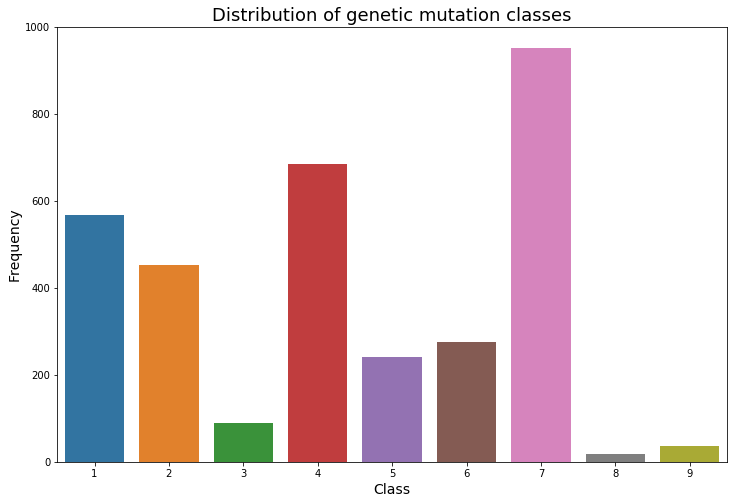

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

### Gene Visualizations

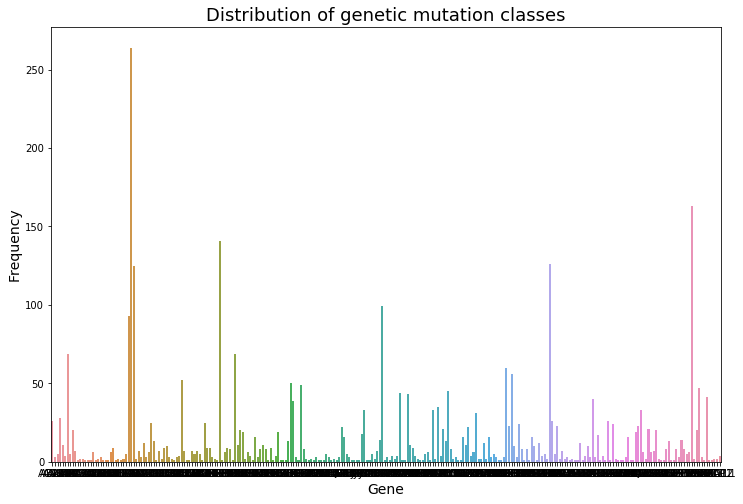

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gene", data=d_train)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

In [62]:
gene_group = d_train.groupby("Gene")['Gene'].count()


In [63]:
gene_group_asc = gene_group.sort_values(ascending=True)

In [64]:
print("Bottom-10 Gene Occurances\n", gene_group_asc[:10])
print()
print("Top-10 Gene Occurances\n", gene_group_asc.sort_values(ascending=False)[:10])

Bottom-10 Gene Occurances
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64

Top-10 Gene Occurances
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64


## Top 20 Genes then Top 20 Variation

In [75]:
print("Top-20 Gene Occurances\n")
top_20_genes = d_train.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(type(top_20_genes))
top_20_genes = top_20_genes.index.values
print(top_20_genes)
print(type(top_20_genes))
t20_genes_df = d_train[
    (d_train['Gene'].isin(top_20_genes))
]

Top-20 Gene Occurances

<class 'pandas.core.series.Series'>
[BRCA1, TP53, EGFR, PTEN, BRCA2, ..., MTOR, KRAS, MAP2K1, VHL, RET]
Length: 20
Categories (264, object): [ABL1, ACVR1, AGO2, AKT1, ..., WHSC1L1, XPO1, XRCC2, YAP1]
<class 'pandas.core.categorical.Categorical'>


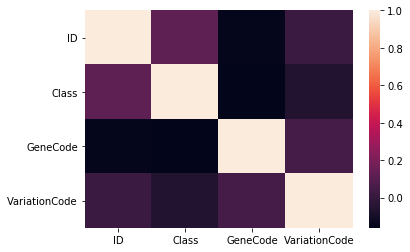

In [74]:
# Calculate correlations
corr = d_train.corr()

# Heatmap
sns.heatmap(corr)
plt.show()

In [83]:
# of the top-20 genes - display the count of the variations
print("Top-20 Variation Occurances within top-20 occuring genes\n")
print(t20_genes_df.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20])
t20_vars_arr = t20_genes_df.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20].index.values
print("The list of top 20 vars subset: ", t20_vars_arr)

Top-20 Variation Occurances within top-20 occuring genes

Variation
Amplification           10
Deletion                 6
Truncating Mutations     6
Fusions                  4
T167A                    2
R841K                    2
I31M                     2
p61BRAF                  1
K525E                    1
K517R                    1
K513R                    1
K50L                     1
K550_K558del             1
K50E                     1
K509I                    1
K499E                    1
K483M                    1
K483E                    1
K467T                    1
K526E                    1
Name: Variation, dtype: int64
The list of top 20 vars subset:  [Amplification, Deletion, Truncating Mutations, Fusions, T167A, ..., K499E, K483M, K483E, K467T, K526E]
Length: 20
Categories (2996, object): [1_2009trunc, 2010_2471trunc, 256_286trunc, 3' Deletion, ..., YAP1-MAMLD1 Fusion, ZC3H7B-BCOR Fusion, ZNF198-FGFR1 Fusion, p61BRAF]


In [86]:
t20_vars_df = t20_genes_df[
    (t20_genes_df['Variation'].isin(t20_vars_arr))
]
print(t20_vars_df)

        ID    Gene             Variation  Class  GeneCode  VariationCode
145    145    EGFR                 K467T      2        66           1263
204    204    EGFR         Amplification      7        66            149
260    260    EGFR                 R841K      1        66           2258
417    417    TP53  Truncating Mutations      1       252           2629
650    650  CDKN2A  Truncating Mutations      1        51           2629
664    664  CDKN2A              Deletion      4        51            473
744    744   ERBB2         Amplification      7        72            149
880    880  PDGFRA                 R841K      7       179           2258
912    912  PDGFRA         Amplification      7       179            149
1015  1015    TSC2  Truncating Mutations      1       255           2629
1036  1036    TSC2              Deletion      1       255            473
1165  1165  PIK3CA                  I31M      5       181           1156
1198  1198  PIK3CA         Amplification      2    

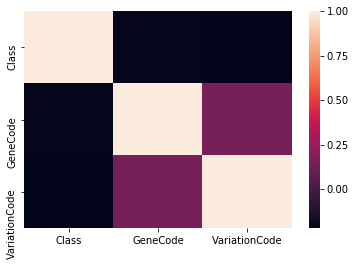

In [94]:
# Calculate correlations
corr2 = t20_vars_df[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr2)
plt.show()

## Variation Top 20 then Gene Top 20

In [96]:
t20_vars_arr = d_train.groupby("Variation")['Variation'].count().sort_values(ascending=False)[:20].index.values
print("The list of top 20 vars subset: ", t20_vars_arr)

The list of top 20 vars subset:  ['Truncating Mutations' 'Deletion' 'Amplification' 'Fusions'
 'Overexpression' 'G12V' 'E17K' 'T58I' 'Q61L' 'Q61R' 'Q61H'
 'ETV6-NTRK3 Fusion' 'T286A' 'P34R' 'EWSR1-ETV1 Fusion' 'G12S' 'Y42C'
 'Q61K' 'I31M' 'G12A']


In [101]:
t20_vars_df = t20_genes_df[
    (t20_genes_df['Variation'].isin(t20_vars_arr))
]
print(t20_vars_df)
t20_genes_arr = t20_vars_df.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(t20_genes_arr)
top_20_genes = t20_genes_arr.index.values
t20_genes_df = t20_vars_df[
    (t20_vars_df['Gene'].isin(top_20_genes))
]
print(t20_genes_df)

        ID    Gene             Variation  Class  GeneCode  VariationCode
204    204    EGFR         Amplification      7        66            149
417    417    TP53  Truncating Mutations      1       252           2629
650    650  CDKN2A  Truncating Mutations      1        51           2629
664    664  CDKN2A              Deletion      4        51            473
744    744   ERBB2         Amplification      7        72            149
912    912  PDGFRA         Amplification      7       179            149
1015  1015    TSC2  Truncating Mutations      1       255           2629
1036  1036    TSC2              Deletion      1       255            473
1165  1165  PIK3CA                  I31M      5       181           1156
1198  1198  PIK3CA         Amplification      2       181            149
1456  1456   FGFR2               Fusions      2        94            807
1538  1538     ALK         Amplification      2         6            149
1560  1560     ALK               Fusions      2    

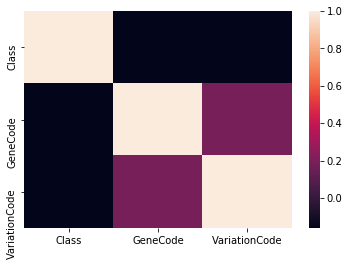

In [103]:
# Calculate correlations
corr3 = t20_genes_df[['Class', 'GeneCode', 'VariationCode']].corr()

# Heatmap
sns.heatmap(corr3)
plt.show()

## Top 20 Genes Class Distribution

Fresh Data Set

In [106]:
d_train = pd.read_csv('genetic-data/training_variants')
# converting Gene and Variation to categories
d_train['Gene'] = d_train['Gene'].astype('category')
d_train['Variation'] = d_train['Variation'].astype('category')
d_train['Gene'].head().cat.codes
d_train['GeneCode'] = d_train['Gene'].cat.codes
d_train['VariationCode'] = d_train['Variation'].cat.codes
d_train.head()

,ID,Gene,Variation,Class,GeneCode,VariationCode
0,0,FAM58A,Truncating Mutations,1,85,2629
1,1,CBL,W802*,2,39,2856
2,2,CBL,Q249E,2,39,1897
3,3,CBL,N454D,3,39,1667
4,4,CBL,L399V,4,39,1447


Getting top 20 genes from fresh dataset

In [107]:
t20_genes_arr = d_train.groupby("Gene")['Gene'].count().sort_values(ascending=False)[:20]
print(t20_genes_arr)
top_20_genes = t20_genes_arr.index.values
t20_genes_df = d_train[
    (d_train['Gene'].isin(top_20_genes))
]
print(t20_genes_df)

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64
        ID  Gene          Variation  Class  GeneCode  VariationCode
138    138  EGFR   L747_T751delinsP      7        66           1519
139    139  EGFR       S752_I759del      2        66           2465
140    140  EGFR              I491M      5        66           1168
141    141  EGFR       D770_P772dup      7        66            421
142    142  EGFR              G719A      7        66            975
143    143  EGFR              G735S      7        66            980
144    144  EGFR       N771_H773dup      7        66           1707
145    145  EGFR              K467T      2        66           1263
146    146  EGFR     E746_T751insIP      7        66            641
147    147

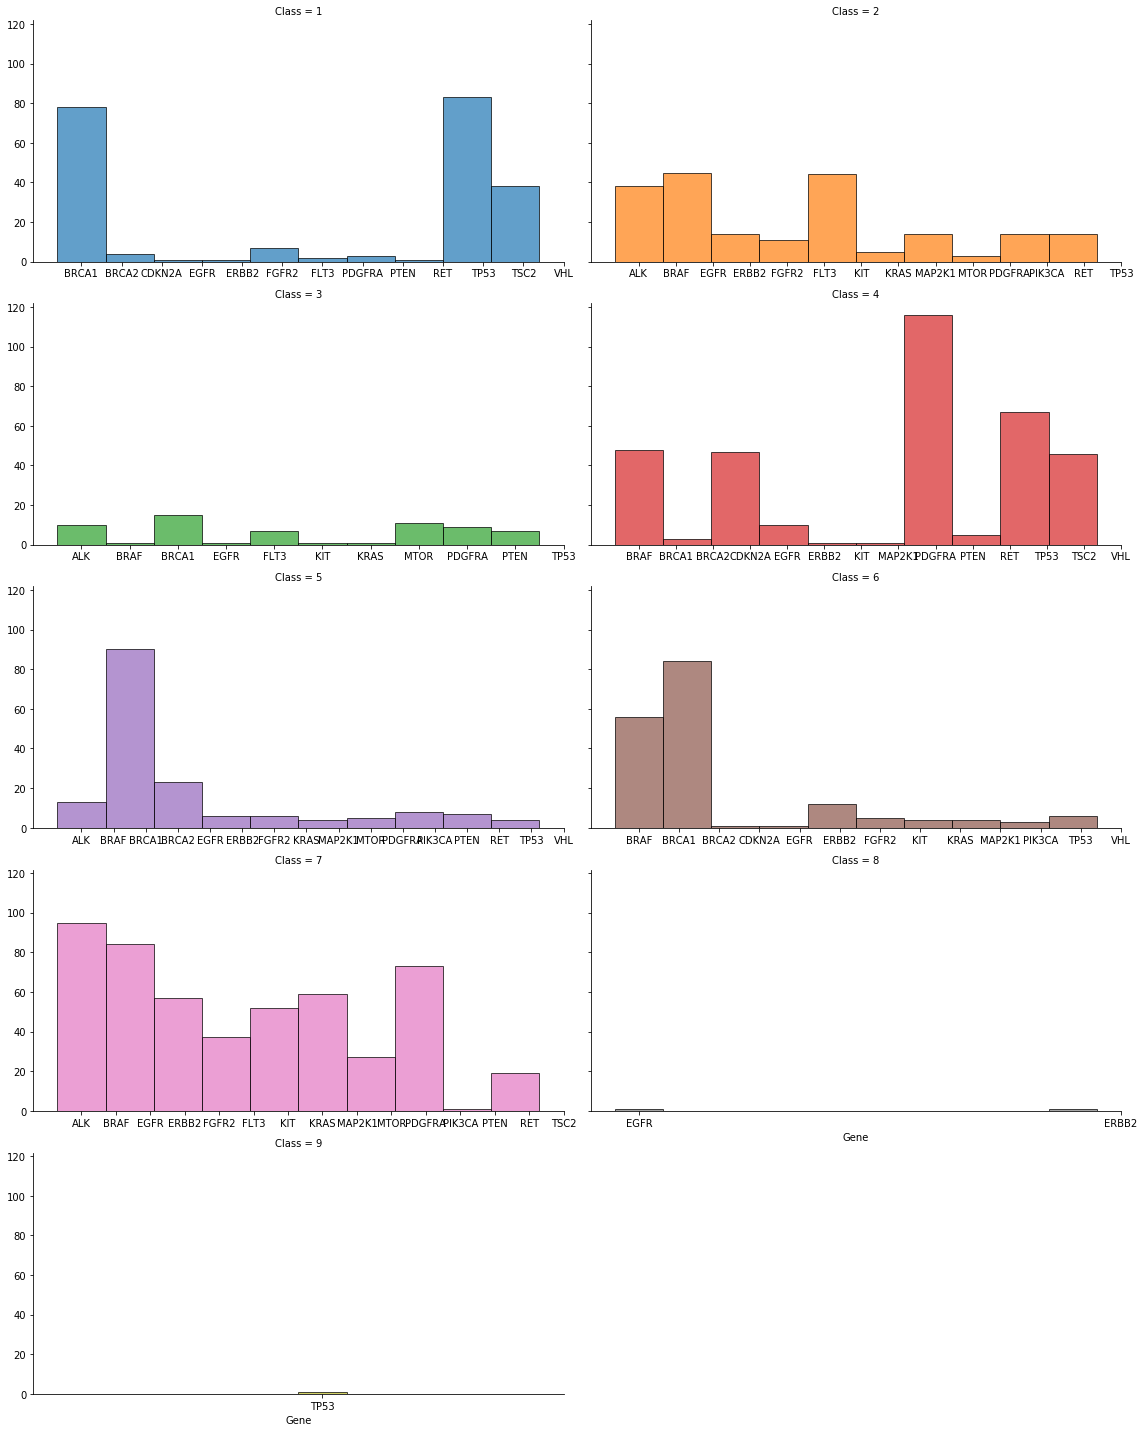

In [236]:
g = sns.FacetGrid(t20_genes_df, col="Class", col_wrap=2, size=4, aspect=2, hue="Class", margin_titles=True, sharex=False)
g.map(plt.hist, "Gene", alpha=0.7, edgecolor='#000000', align='left');
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
plt.tight_layout()

## Natural Language Processing

In [246]:
import pandas as pd       
#train = pd.read_csv("genetic-data/training_text", header=0, sep='\|\|', engine='python')
train = pd.read_csv("genetic-data/training_text", sep='\|\|', skiprows=1, engine='python', names=['ID', 'Text'])

In [252]:
print(train.head())
print("train shape = ", train.shape)
print("train index values = ", train.columns.values)

   ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...
train shape =  (3321, 2)
train index values =  ['ID' 'Text']


In [253]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             

# regex
import re

# nltk
import nltk
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [267]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z\-]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [283]:
#print(train["Text"][1])
# Get the number of reviews based on the dataframe column size
num_reviews = train["Text"].size
print(num_reviews)

print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0,num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))                                                                    
    clean_train_reviews.append( review_to_words( train["Text"][i] ))

3321
Cleaning and parsing the training set movie reviews...

Review 1000 of 3321

Review 2000 of 3321

Review 3000 of 3321



In [284]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [285]:
print(train_data_features.shape)

(3321, 5000)


In [286]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['aa', 'aacr', 'aacrjournals', 'aag', 'ab', 'abbreviations', 'abc', 'abcam', 'abd', 'abdominal', 'aberrant', 'aberrantly', 'aberration', 'aberrations', 'abi', 'abilities', 'ability', 'abl', 'ablation', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abolish', 'abolished', 'abrogate', 'abrogated', 'abrogation', 'absence', 'absent', 'absolute', 'abstract', 'abundance', 'abundant', 'ac', 'acc', 'accelerated', 'accepted', 'acceptor', 'access', 'accessible', 'accession', 'accommodate', 'accompanied', 'accordance', 'according', 'accordingly', 'account', 'accounted', 'accounting', 'accounts', 'accumulate', 'accumulated', 'accumulation', 'accuracy', 'accurate', 'accurately', 'acetate', 'acetylation', 'acgh', 'achievable', 'achieve', 'achieved', 'acid', 'acidic', 'acids', 'acinar', 'acquire', 'acquired', 'acquisition', 'acral', 'across', 'act', 'actin', 'acting', 'action', 'actionable', 'activate', 'activated', 'activates', 'activating', 'activation', 'activator', 'activators', 'active', '

In [287]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(tag, count)

aa 3710
aacr 507
aacrjournals 3233
aag 492
ab 1446
abbreviations 765
abc 961
abcam 579
abd 978
abdominal 450
aberrant 4301
aberrantly 484
aberration 567
aberrations 2929
abi 1369
abilities 452
ability 15652
abl 7634
ablation 495
able 5706
abnormal 1879
abnormalities 2907
abnormality 623
abolish 1245
abolished 1296
abrogate 1057
abrogated 1557
abrogation 477
absence 11187
absent 1911
absolute 710
abstract 1114
abundance 1215
abundant 767
ac 2110
acc 1948
accelerated 829
accepted 907
acceptor 717
access 2918
accessible 2579
accession 1479
accommodate 554
accompanied 1291
accordance 1563
according 11154
accordingly 1259
account 2698
accounted 694
accounting 478
accounts 830
accumulate 647
accumulated 627
accumulation 3563
accuracy 656
accurate 635
accurately 449
acetate 799
acetylation 1315
acgh 452
achievable 450
achieve 1260
achieved 3158
acid 20241
acidic 1017
acids 10541
acinar 693
acquire 534
acquired 5537
acquisition 1358
acral 791
across 4888
act 3022
actin 3105
acting 998
action 1

chromatin 3559
chromatography 1290
chromosomal 3979
chromosome 7834
chromosomes 1576
chronic 3125
ci 4514
cial 554
cic 1164
ciency 441
cient 1562
cip 734
circle 449
circles 517
circular 436
cis 1376
cisplatin 3816
city 920
ck 692
cl 1415
clarified 441
clarify 663
class 10775
classes 3409
classic 845
classical 2307
classifi 2893
classification 9859
classifications 1061
classified 7351
classify 1443
clear 5949
cleared 443
clearly 3244
cleavage 2194
cleaved 715
cleft 756
clin 848
clincancerres 451
clinic 1286
clinical 34870
clinically 4311
clinicians 628
clinicopathologic 530
clinicopathological 597
cll 1112
clonal 2144
clone 3465
cloned 2983
clones 6565
cloning 1671
clontech 921
close 3247
closed 922
closely 1546
cluster 4030
clustered 1426
clustering 1870
clusters 1484
cm 2251
cml 2011
cmml 773
cmv 838
cns 869
co 13315
coactivator 813
coactivators 465
coated 609
cocktail 549
code 1237
codes 664
coding 6039
codon 8635
codons 3743
coefficient 500
coexpressed 810
coexpression 752
cohort 56

helical 2228
helicase 1184
helices 1930
helix 8526
help 3268
helpful 487
hematologic 1053
hematopoiesis 603
hematopoietic 3000
hematoxylin 799
hemizygous 411
hence 2194
hepatocellular 982
hepatocyte 458
hepatocytes 431
hepes 1036
her 639
hereafter 421
hereditary 1993
herein 633
hes 1742
hetero 498
heterocomplex 624
heterodimer 2445
heterodimerization 1180
heterodimers 989
heterogeneity 2325
heterogeneous 1553
heterologous 1105
heterotrimeric 528
heterozygosity 1534
heterozygotes 510
heterozygous 4918
hey 496
hg 3184
hgf 1736
hgs 655
hh 1723
hierarchical 546
hif 6934
high 27064
higher 13209
highest 2533
highlight 974
highlighted 1347
highlighting 445
highlights 950
highly 11635
hindiii 604
hinge 1495
his 737
hiseq 426
histidine 944
histogram 460
histologic 1242
histological 1327
histologically 662
histology 1993
histone 3982
histopathologic 429
histopathological 463
histopathology 755
histories 597
history 7765
hit 555
hits 459
hla 1741
hmc 976
hmg 861
hmlh 1095
hmsh 1115
hnf 1097
hnpcc

parts 615
passage 747
passenger 1222
past 871
patch 721
pathogenesis 2742
pathogenic 10554
pathogenicity 3241
pathologic 655
pathological 1559
pathology 1979
pathway 26840
pathways 13296
patient 24798
patients 86405
pattern 5000
patterns 3243
pax 910
pb 650
pbf 440
pbrm 460
pbs 3423
pc 3547
pca 913
pcdna 2831
pcmv 760
pcr 22830
pd 4178
pdac 515
pdb 2405
pde 429
pdgf 2783
pdgfr 4421
pdgfra 12233
pdgfrb 1728
pdk 551
pdx 1977
pe 947
peak 1286
peaks 755
pediatric 1707
pedigree 1910
pedigrees 1892
pellet 499
pellets 547
penetrance 2037
penicillin 1006
peptide 7215
peptides 2641
per 9359
percent 1467
percentage 4144
percentages 524
perform 781
performance 1418
performed 24144
performing 591
perhaps 2085
period 1412
peripheral 2644
perk 1169
perkin 450
peroxidase 1166
persistent 534
personal 2240
personalized 529
perturb 484
perturbation 462
perturbations 554
pest 1252
pet 676
pf 2987
pfizer 657
pfs 2902
pg 659
pgk 553
pgl 507
ph 7974
pharmacia 630
pharmacologic 522
pharmacological 903
phase 

tract 1224
trafficking 559
trametinib 1168
trans 1798
transactivate 607
transactivation 4820
transcribed 964
transcript 3573
transcriptase 665
transcription 17305
transcriptional 15720
transcriptionally 545
transcriptome 995
transcripts 3171
transduced 4126
transduction 3465
transfectants 1122
transfected 19235
transfection 9640
transfections 1218
transfer 1045
transferase 556
transferred 2264
transform 1293
transformants 926
transformation 8545
transformed 4778
transforming 5710
transgene 910
transgenic 2147
transient 2264
transiently 3233
transition 2557
transitions 654
translated 1175
translation 2489
translational 1550
translocated 460
translocation 3730
translocations 2162
transmembrane 2380
transplantation 1070
transplanted 665
transport 478
trastuzumab 1051
treat 799
treated 15896
treating 872
treatment 30209
treatments 1790
tree 869
trend 713
trial 3089
trials 4825
tric 1125
trigger 640
triggered 554
triggers 458
triphosphate 707
triple 907
triplicate 2200
triplicates 589
tris 